In [1]:
import pandas as pd

In [2]:
import descartes
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
%matplotlib inline
import adjustText as aT
import geocoder

In [3]:
# !pip install adjustText

In [4]:
# ! pip install geocoder
# https://stackoverflow.com/questions/13686001/python-module-for-getting-latitude-and-longitude-from-the-name-of-a-us-city

In [5]:
from missing_columns_pd import miss_cols

In [6]:
pop_by_county = pd.read_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\census data\Iowa population by county from Iowa demographics.csv')

In [7]:
# pop_by_county[['County','Population']]

In [8]:
# s.replace('is','was')
pop_by_county['county2'] = pop_by_county.County.str.replace('County','')
pop_by_county['county2'] = pop_by_county['county2'].str.rstrip()
pop_by_county['county2'] = pop_by_county['county2'].str.lstrip()
pop_by_county['county2'] = pop_by_county['county2'].str.lower()

In [9]:
# pop_by_county.set_index('county2')
pop_by_county.head()

,Rank,County,Population,county2
0,1,Polk County,485418,polk
1,2,Linn County,225601,linn
2,3,Scott County,172938,scott
3,4,Johnson County,150819,johnson
4,5,Black Hawk County,131813,black hawk


In [10]:
sdtypes = {'Store_Number':str,'Zip_Code':str, 'Store_Location':str, 'County_Number':str}

In [11]:
stores = pd.read_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\stores_2021.csv',index_col=0, dtype=sdtypes)

In [12]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1948 entries, 223124 to 1094183
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Store_Number    1948 non-null   object
 1   Store_Name      1948 non-null   object
 2   Address         1948 non-null   object
 3   City            1948 non-null   object
 4   Zip_Code        1948 non-null   object
 5   Store_Location  1790 non-null   object
 6   County_Number   1948 non-null   object
 7   County          1948 non-null   object
dtypes: object(8)
memory usage: 137.0+ KB


In [13]:
stores['county_copy'] = stores.County.str.lower()          

In [14]:
stores['county2'] = stores.County.str.lower()


In [15]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1948 entries, 223124 to 1094183
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Store_Number    1948 non-null   object
 1   Store_Name      1948 non-null   object
 2   Address         1948 non-null   object
 3   City            1948 non-null   object
 4   Zip_Code        1948 non-null   object
 5   Store_Location  1790 non-null   object
 6   County_Number   1948 non-null   object
 7   County          1948 non-null   object
 8   county_copy     1948 non-null   object
 9   county2         1948 non-null   object
dtypes: object(10)
memory usage: 167.4+ KB


In [16]:
# stores.loc[stores.county2.isin(['buena vist', 'cerro gord', 'obrien', 'pottawatta']),['county2'] ]

In [17]:
county_dict = {'buena vist':'buena vista','cerro gord':'cerro gordo', 'obrien':"o'brien", 'pottawatta':'pottawattamie'}

In [18]:
county_index = stores.county2.isin(['buena vist', 'cerro gord', 'obrien', 'pottawatta'])

In [19]:
stores.loc[county_index, 'county2'] = stores.loc[county_index].apply(lambda current_row: county_dict[current_row[-1]], axis=1 ) 

In [20]:
# check applied correctly
stores.loc[stores.county_copy.isin(['buena vist', 'cerro gord', 'obrien', 'pottawatta']),['county2','county_copy'] ]

,county2,county_copy
223124,buena vista,buena vist
262897,buena vista,buena vist
313965,o'brien,obrien
314123,o'brien,obrien
373775,buena vista,buena vist
...,...,...
1086279,pottawattamie,pottawatta
1086243,pottawattamie,pottawatta
1086249,buena vista,buena vist
1086258,pottawattamie,pottawatta


In [21]:
stores_in_counties = stores.groupby(['county2']).agg({'Store_Number':'nunique'}).reset_index()
stores_in_counties.head(10)

,county2,Store_Number
0,adair,7
1,adams,2
2,allamakee,10
3,appanoose,9
4,audubon,4
5,benton,16
6,black hawk,93
7,boone,14
8,bremer,13
9,buchanan,17


In [22]:
store_locations = stores[['Store_Name','Store_Location']]

#from documentation

d = {'col1': ['name1', 'name2'], 'wkt': ['POINT (1 2)', 'POINT (2 1)']}

df = pd.DataFrame(d)

gs = geopandas.GeoSeries.from_wkt(df['wkt'])

gdf = geopandas.GeoDataFrame(df, geometry=gs, crs="EPSG:4326")


### from Sam

where locations is your db with the store data, and 'StoreLocation' is the name of the column

from shapely import wkt

locations['StoreLocation'].apply(wkt.loads)

In [23]:
from shapely import wkt

# locations['StoreLocation'].apply(wkt.loads)

In [24]:
stores.Store_Location

223124                                      NaN
231153             POINT (-95.752119 43.397431)
239961              POINT (-95.143701 43.12759)
246141             POINT (-94.681939 43.111913)
262897             POINT (-94.953239 42.777449)
                           ...                 
1086261    POINT (-94.73259400000002 40.991872)
1086262    POINT (-95.81799900000001 41.280148)
1086263            POINT (-91.553462 42.037621)
1086241            POINT (-94.173816 42.501131)
1094183            POINT (-93.833455 41.614719)
Name: Store_Location, Length: 1948, dtype: object

In [25]:
locations = stores[['Store_Name','Store_Location']]
locations = locations.dropna()
# store_locations
locations['Store_Location'].apply(wkt.loads)
# where locations is your db with the store data, and 'StoreLocation' is the name of the column

231153             POINT (-95.752119 43.397431)
239961              POINT (-95.143701 43.12759)
246141             POINT (-94.681939 43.111913)
262897             POINT (-94.953239 42.777449)
262310             POINT (-91.473634 43.262114)
                           ...                 
1086261    POINT (-94.73259400000002 40.991872)
1086262    POINT (-95.81799900000001 41.280148)
1086263            POINT (-91.553462 42.037621)
1086241            POINT (-94.173816 42.501131)
1094183            POINT (-93.833455 41.614719)
Name: Store_Location, Length: 1790, dtype: object

In [26]:
# create lists for dicitionary creation

names = list(locations.Store_Name)
# print('type(names) = ', type(names))

points = list(locations.Store_Location)
type(points)

list

In [27]:
#create dictionary

d = {'col1':names, 'geometry':points }

<AxesSubplot:>

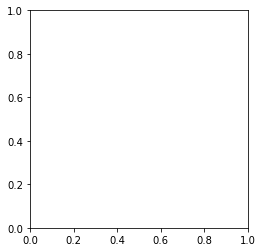

In [28]:
# create GeoDataFrame from dictionary

loc_gdf = gpd.GeoDataFrame(d, crs="EPSG:4326")
loc_gdf.plot()

In [29]:
type(loc_gdf)

geopandas.geodataframe.GeoDataFrame

In [30]:
type(loc_gdf.geometry)

geopandas.geoseries.GeoSeries

#from documentaiton
 
d = {'col1': ['name1', 'name2'], 'geometry': [Point(1, 2), Point(2, 1)]}

gdf = geopandas.GeoDataFrame(d, crs="EPSG:4326")

gdf

In [31]:
# from geopandas import GeoSeries
# store_locations = stores[['Store_Name','Store_Location']]
# store_locations = store_locations.dropna()
# store_locations.columns = ['name','geometry']
# locations_gpd = gpd.GeoDataFrame(store_locations, crs="EPSG:4326")

In [32]:
# type(locations_gpd)

read in us shape file

In [33]:

us = gpd.read_file(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\us-county-boundaries.shp')

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\geopandas\array.py:85: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


In [34]:
us.head(2)

,statefp,countyfp,countyns,geoid,name,namelsad,stusab,lsad,classfp,mtfcc,...,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,state_name,countyfp_no,geometry
0,39,063,01074044,39063,Hancock,Hancock County,OH,06,H1,G4020,...,22300,None,A,1.376126e+09,6020647.0,+41.0004711,-083.6660335,Ohio,63,"POLYGON ((-83.88076 41.08036, -83.88076 41.081..."
1,51,179,01480173,51179,Stafford,Stafford County,VA,06,H1,G4020,...,47900,47894,A,6.972372e+08,28088011.0,+38.4132608,-077.4513342,Virginia,179,"POLYGON ((-77.58878 38.50404, -77.58295 38.508..."


create Iowa geodataframe


In [35]:
iowa = us[us.stusab == "IA"]

In [36]:
type(iowa)

geopandas.geodataframe.GeoDataFrame

In [37]:
# metdivfp csafp cbsafp
iowa.head()

,statefp,countyfp,countyns,geoid,name,namelsad,stusab,lsad,classfp,mtfcc,...,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,state_name,countyfp_no,geometry
4,19,031,00465205,19031,Cedar,Cedar County,IA,06,H1,G4020,...,None,None,A,1.500799e+09,6385832.0,+41.7723600,-091.1326105,Iowa,31,"POLYGON ((-91.36608 41.86007, -91.36620 41.860..."
6,19,089,00465233,19089,Howard,Howard County,IA,06,H1,G4020,...,None,None,A,1.225703e+09,931478.0,+43.3653125,-092.3219084,Iowa,89,"POLYGON ((-92.55374 43.42890, -92.55373 43.429..."
25,19,181,00465279,19181,Warren,Warren County,IA,06,H1,G4020,...,19780,None,A,1.475873e+09,9097100.0,+41.3324459,-093.5687512,Iowa,181,"POLYGON ((-93.55821 41.51148, -93.55674 41.511..."
126,19,121,00465249,19121,Madison,Madison County,IA,06,H1,G4020,...,19780,None,A,1.452999e+09,2983840.0,+41.3306216,-094.0151842,Iowa,121,"POLYGON ((-93.89712 41.50310, -93.89681 41.503..."
148,19,165,00465271,19165,Shelby,Shelby County,IA,06,H1,G4020,...,None,None,A,1.530111e+09,1486125.0,+41.6790143,-095.3089173,Iowa,165,"POLYGON ((-95.32481 41.86410, -95.32479 41.864..."


create merge key

In [38]:
iowa['county2'] = iowa.name.str.lower()

C:\Users\dgarb\AppData\Local\Temp/ipykernel_18020/2015023351.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iowa['county2'] = iowa.name.str.lower()


In [39]:
type(iowa)

geopandas.geodataframe.GeoDataFrame

merge iowa shape file with pop_by_county by county2

Note to create a geodataframe, the geodataframe must be on the left of the merge

In [40]:

pop_by_county = pop_by_county[['county2','Population']]

iowa_pop_gdf = iowa.merge(pop_by_county,how='inner')

In [41]:
# iowa_pop_stores_gdf
iowa_pop_stores_gdf = iowa_pop_gdf.merge(stores_in_counties,how='inner')
# iowa_pop_stores_gdf = iowa_pop_gdf.merge(stores_in_counties,how='left')
# iowa_pop_stores_gdf = iowa_pop_gdf.merge(stores_in_counties,how='right')

In [42]:
za = iowa_pop_stores_gdf[['name','geometry','Population']]

In [43]:
type(za)

geopandas.geodataframe.GeoDataFrame

In [44]:
# https://shotlefttodatascience.com/2018/05/16/adding-labels-to-districts-in-geopandas/
# https://github.com/shotleft/how-to-python/blob/master/How%20it%20works%20-%20labelling%20districts%20in%20GeoPandas.ipynb

za["center"] = za["geometry"].centroid
za_points = za.copy()
za_points.set_geometry("center", inplace = True)

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\geopandas\array.py:524: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return _unary_geo("centroid", self)
C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\geopandas\geoseries.py:133: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  data = from_shapely(s.values)
C:\Users\dgarb\AppData\Local\Temp/ipykernel_18020/425826404.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  za["center"] = za["geometry"].centroid


C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\descartes\patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +


1

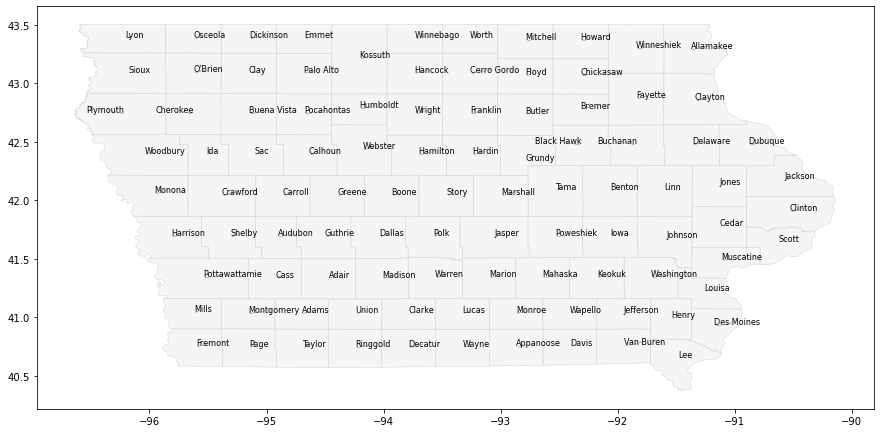

In [45]:
ax = za.plot(figsize = (15, 12), color = "whitesmoke", edgecolor = "lightgrey", linewidth = 0.5)
texts = []

for x, y, label in zip(za_points.geometry.x, za_points.geometry.y, za_points["name"]):
    texts.append(plt.text(x, y, label, fontsize = 8))

aT.adjust_text(texts, force_points=0.3, force_text=0.8, expand_points=(1,1), expand_text=(1,1), 
               arrowprops=dict(arrowstyle="-", color='grey', lw=0.5))

In [46]:
type(iowa_pop_gdf)
type(iowa_pop_stores_gdf)

geopandas.geodataframe.GeoDataFrame

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\descartes\patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +


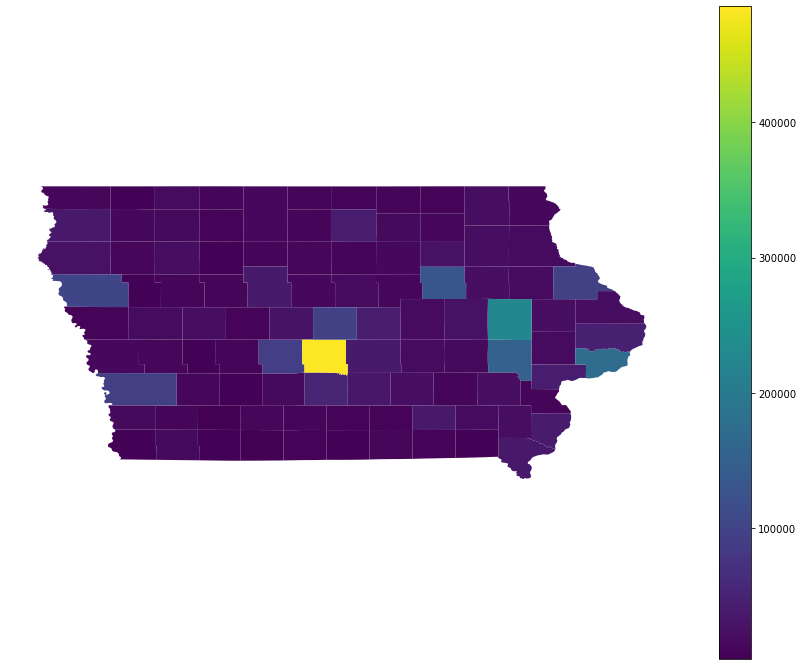

In [47]:
ax = iowa_pop_gdf.plot(column='Population',legend = True, figsize = (15, 12))
# aT.adjust_text(texts, force_points=0.3, force_text=0.8, expand_points=(1,1), expand_text=(1,1), 
#                arrowprops=dict(arrowstyle="-", color='black', lw=0.5))
ax.set_axis_off(); # turns off axis labels

In [54]:
pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows', None)

iowa_pop_gdf[['name','Population']].sort_values(by='Population', ascending=False)


,name,Population
46,Polk,485418
36,Linn,225601
34,Scott,172938
10,Johnson,150819
16,Black Hawk,131813
35,Woodbury,102687
68,Story,97355
90,Dubuque,97193
47,Pottawattamie,93478
9,Dallas,90418


In [49]:
miss_cols(iowa_pop_stores_gdf) #left

[('metdivfp', 99, 1.0), ('csafp', 74, 0.7475), ('cbsafp', 61, 0.6162)]

In [50]:
miss_cols(iowa_pop_stores_gdf) #right

[('metdivfp', 99, 1.0), ('csafp', 74, 0.7475), ('cbsafp', 61, 0.6162)]

In [51]:
# right join
iowa_pop_stores_gdf.loc[iowa_pop_stores_gdf.name.isna(),'county_check' ]

KeyError: 'county_check'

In [ ]:
# left join
iowa_pop_stores_gdf.loc[iowa_pop_stores_gdf.Store_Number.isna(), 'name' ]

In [ ]:
ax = iowa_pop_stores_gdf.plot(column='Store_Number',legend = True, figsize=(15, 10))
ax.set_axis_off(); # turns off axis labels

In [ ]:
loc_gdf = gpd.GeoDataFrame(d, crs=iowa_pop_gdf.crs)
type(loc_gdf)
loc_gdf

In [ ]:
loc_gdf.plot(marker='*', markersize=5);
# locations_gpd.to_crs(iowa_pop_gdf)

In [ ]:
# iowa.head(3)
# iowa.info()